# REDES NEURONALES CONVOLUCIONALES

> Hasta finales de la década de 1980, las redes neuronales se basaban en la idea de recibir vectores de características preprocesados como entrada, como cualquier otro método de clasificación o predicción. Sin embargo, surgió una innovación clave: las redes neuronales convolucionales (CNN). Estas redes revolucionaron el procesamiento de datos al aprender directamente las características relevantes de los datos durante el entrenamiento, en lugar de depender de la extracción manual de características. El nombre "convolucional" proviene de la operación central en la primera capa de estas redes, la convolución. Este enfoque demostró su éxito inicial en tareas como el procesamiento de imágenes y datos similares. Su éxito inicial en tareas como el reconocimiento de dígitos manuscritos fue un hito importante en el campo del aprendizaje profundo.

## Características:

- Convolución:  Se realiza en la primera capa de estas redes en lugar del producto interno (también conocido como multiplicación de matrices) que se usaba en las redes neuronales totalmente conectadas o feedforward,utilizadas anteriormente.

- No solo aprenden los parámetros de la red (los pesos y sesgos de las neuronas) durante el entrenamiento, sino que también aprenden las características directamente de los datos (La red es capaz de identificar automáticamente patrones y características relevantes en los datos sin necesidad de una etapa de preprocesamiento intensiva). 


## Convolución: 

> La convolución implica tomar un pequeño filtro (también llamado kernel) y deslizarlo sobre la entrada de datos. En cada posición, se realiza una multiplicación elemento por elemento entre el filtro y la porción correspondiente de los datos de entrada, y luego se suma el resultado. Esto produce una nueva representación de los datos, que resalta patrones específicos en la entrada.

##### ¿ por qué no es práctico alimentar directamente una red neuronal con datos brutos, como una matriz de imágenes o muestras de voz sin procesar, y por qué es necesario realizar un preprocesamiento para generar características antes de la entrada?

Tomemos el ejemplo de una imagen de matriz 256x256 píxeles:

Tendríamos un vector de entrada de 65.536 dimensiones. Esto significa que habría aproximadamente 65 millones de parámetros que conectarían cada píxel de entrada con cada nodo de la primera capa, lo que resultaría en una red extremadamente grande y difícil de entrenar; La complejidad aumenta aún más con imágenes de alta resolución, como 1000x1000 píxeles, y aún más si se trata de imágenes en color con una representación RGB, ya que cada píxel tendría tres valores (rojo, verde y azul), lo que triplicaría la dimensionalidad de la entrada.

A medida que se agregan más capas ocultas a una red neuronal, el número de parámetros en la red aumenta significativamente. Esto no solo conlleva problemas computacionales, sino que también pone en riesgo el rendimiento de generalización de la red, lo que significa que podría tender a ajustarse en exceso a los datos de entrenamiento y no generalizar bien a datos nuevos.

Además de la explosión en el número de parámetros, la vectorización de una matriz de imágenes conlleva una pérdida de información importante. Al convertir una imagen en un vector plano, se pierde la información sobre cómo los píxeles se relacionan entre sí en áreas específicas de la imagen. Los métodos de generación de características, desarrollados a lo largo de los años, se centran en extraer información que capture estas correlaciones y dependencias estadísticas entre los valores de los píxeles dentro de la imagen. En otras palabras, estos métodos de generación de características ayudan a "codificar" eficazmente la información relevante para el aprendizaje que reside en los datos brutos, permitiendo que la red neuronal trabaje con representaciones más significativas y eficientes de los datos en lugar de lidiar con la alta dimensionalidad y la pérdida de información inherentes a los datos brutos.

<details>
<summary>leer</summary>

En el contexto de las redes neuronales convolucionales (CNN), se realiza una convolución en lugar de una simple conversión de la imagen en un vector plano. La convolución es una operación que permite a la red preservar las relaciones espaciales entre los píxeles en una imagen. En lugar de perder información sobre cómo los píxeles se relacionan entre sí en áreas específicas de la imagen, las CNN aprenden a identificar patrones y características locales, como bordes, texturas y objetos, precisamente teniendo en cuenta estas relaciones espaciales.

Entonces, en contraste con la simple vectorización que se mencionaba anteriormente, donde se pierde información espacial, las CNN se diseñan específicamente para conservar y utilizar esta información. Por lo tanto, las CNN no sufren de la misma pérdida de información en términos de relaciones espaciales entre píxeles que mencionaba el texto anterior. En lugar de eso, aprovechan estas relaciones para capturar características relevantes de las imágenes de manera eficaz, lo que las hace muy adecuadas para tareas de procesamiento de imágenes.

</details>


Por lo tanto, el preprocesamiento de datos, como la extracción de características relevantes, es necesario para reducir la dimensionalidad y resaltar información importante antes de alimentarla a la red neuronal. Esto hace que el proceso sea más manejable, reduce la cantidad de parámetros y permite que la red aprenda patrones y características más significativos en los datos procesados, en lugar de lidiar con la alta dimensionalidad de los datos brutos.

Los pasos básicos de cualquier red convolucional son:

- La etapa de convolución.

- El paso de no linealidad.

- El paso de agrupación.

## CONVOLUCIÓN Y SUS ETAPAS

Nos centraremos en el caso en que la entrada de la red esté formada por imágenes. La imagen matricial de entrada se denomina $I$:

![Convolución: Reparto de pesos](\imagenes\convolucion_1.png)

Se trata de una matriz de 3 × 3; nótese que la entrada es no vectorizada. Utilizaremos $h$ para denotar los parámetros asociados.Recordemos que en una red totalmente conectada, cada nodo (neurona) está asociado con un vector de parámetros, $ \theta_i $, para el nodo i-th cuya dimensionalidad es igual al número de nodos de la capa anterior:

![Red neuronal](\imagenes\nodo.png)

Ahora, cada nodo estará asociado a un único parámetro. Para ello, dispondremos los nodos en forma de matriz bidimensional. El primer nodo se caracteriza por $h(1,1)$, el segundo por $h(1,2)$, y así sucesivamente. En otras palabras, cualquier conexión que termine en el primer nodo se multiplicará por el mismo peso $h(1,1)$, y un argumento similar es válido para el resto de los nodos

Para entender por qué, supongamos que utilizamos un único parámetro por nodo en una red totalmente conectada. Entonces, la salida del combinador lineal asociado al primer nodo sería $O(1,1)=h(1,1)a$, donde $a$ es la suma de todas las entradas al nodo recibidas de la capa anterior. La salida respectiva del segundo nodo sería $O(1,2)=h(1,2)a$, y así sucesivamente. Por lo tanto, todos los nodos proporcionarían básicamente la misma información con respecto a los valores de entrada; la única diferencia serían los distintos pesos que actúan sobre la misma información de entrada de la capa anterior.

Pasemos ahora a introducir un concepto diferente, en el que mantenemos un único parámetro por nodo, aunque cada una de las salidas de una capa oculta transmite información diferente con respecto a las distintas entradas que se reciben de la capa anterior. Para ello, introduciremos las convoluciones. En este contexto, los nodos de la capa oculta se interpretan como elementos de una matriz $H$, y convolucionamos con la matriz de entrada entrada $I$. El primer valor de salida de la capa oculta será:

$O(1,1)=h(1,1)I(1,1)+h(1,2)I(1,2)+h(2,1)I(2,1)+h(2,2)I(2,2)$

El resultado anterior se obtiene si colocamos la matriz $H$ de (2 x 2) sobre $I$, empezando por la esquina superior izquierda. Desde un punto de vista físico, el valor $O(1,1)$ resultante es una media ponderada sobre un área local dentro de la matriz $I$


Tiene sentido, que lo siguiente a este paso sea obtener la media ponderada resultante de cada área local dentro de la matriz I: 

Siguiendo el mismo razonamiento anterior, las medias ponderadas sobre las distintas áreas locales dentro de la matriz I son: 


$O(1,2)=h(1,1)I(1,2)+h(1,2)I(1,3)+h(2,1)I(2,2)+h(2,2)I(2,3)$

$O(2,1)=h(1,1)I(2,1)+h(1,3)I(2,2)+h(2,1)I(3,1)+h(2,2)I(3,2)$

$O(2,2)=h(1,1)I(2,2)+h(1,3)I(2,3)+h(2,1)I(3,2)+h(2,2)I(3,3)$

Las salidas obtenidas será entonces: 

$O(1,1)=h(1,1)I(1,1)+h(1,2)I(1,2)+h(2,1)I(2,1)+h(2,2)I(2,2)$

$O(1,2)=h(1,1)I(1,2)+h(1,2)I(1,3)+h(2,1)I(2,2)+h(2,2)I(2,3)$

$O(2,1)=h(1,1)I(2,1)+h(1,3)I(2,2)+h(2,1)I(3,1)+h(2,2)I(3,2)$

$O(2,2)=h(1,1)I(2,2)+h(1,3)I(2,3)+h(2,1)I(3,2)+h(2,2)I(3,3)$



Entonces , las salidas de esta capa oculta es también una matriz de 2x2, la cual denotaremos como $O$. Cada uno de los elementos de la matriz de salida codifica información de un área diferente de la imagen de entrada

![Salida](\imagenes\o.png)

En el entorno más general, la operación de convolución entre dos matrices $H \in R^{mxm}$ e  $I \in R^{lxl}$ , es otra matriz definida por:




![Salida](\imagenes\formula.png)

Se conoce como operación de correlación cruzada: operaciones ponderadas sobre los píxeles dentro de un área de ventana de una imagen

- En otras palabras, $O(i,j)$ contiene información en un área de ventana de la matriz de entrada. 

- El elemento $I(i,j)$ es el elemento superior izquierdo de esta área de la ventana.

- El tamaño de la matriz de salida depende de las suposiciones que se adopten sobre cómo tratar los elementos/píxeles en los bordes de I

- El tamaño de la ventana depende del valor de $m$ .




En una CNN, cada capa oculta corresponde a una (o a más de una, como pronto veremos) matriz $H$, la cual se utiliza para realizar convoluciones. Desde el punto de vista del tratamiento de señales, esta matriz es un filtro que actúa sobre la entrada para proporcionar la salida, también se denomina matriz kernel en lugar de filtro. La matriz de salida suele denominarse la matriz del mapa de características

- Se tiene que: 

Los parámetros que componen la capa oculta son compartidos por todos los píxeles de entrada y no tenemos un conjunto dedicado de parámetros por elemento de entrada (píxel)

Las salidas de la capa oculta codifican la información de correlación de vecindad local de las distintas zonas de la imagen de entrada.

Además, como la salida de la capa oculta también es una matriz de imágenes, se puede considerar como la entrada a una segunda capa oculta y construir así una red con muchas capas, cada una de las cuales realiza convoluciones

Estas operaciones de filtrado se han utilizado tradicionalmente para generar características a partir de imágenes. La diferencia era que los elementos de la matriz de filtrado se preseleccionaban. Tomemos ejemplo, la siguiente matriz:

![Salida](\imagenes\filtro.png)

El filtro anterior se conoce como detector de bordes. Convolucionando una matriz de imagen, $I$ , con la matriz anterior, $H$, detecta los bordes de una imagen:

![Salida](\imagenes\barco.png)

La detección de bordes es de gran importancia en la comprensión de imágenes. Además, cambiando adecuadamente los valores en $H$
, se pueden detectar bordes en diferentes orientaciones, por ejemplo, diagonal, vertical, horizontal; en otras palabras, cambiando los valores de 
 $H$ se pueden generar diferentes tipos de características.

In [1]:
from skimage.color import rgb2gray
#Esta función se utiliza para convertir imágenes en color en imágenes en escala de grises.
from skimage.io import imread
# Importa la función imread de la biblioteca scikit-image. Esta función se utiliza para cargar imágenes desde archivos en diversos formatos.
import numpy as np
from scipy import signal
#biblioteca científica que proporciona herramientas para diversas aplicaciones numéricas, incluyendo procesamiento de señales.
import matplotlib.pylab as pylab
#módulo que combina características de NumPy y Matplotlib para una experiencia de usuario similar a la de MATLAB.

In [2]:
# La conversión a tipo flotante puede ser útil si se planea realizar cálculos numéricos o procesamiento de imagen que requieran valores en coma flotante.
im = rgb2gray(imread('imagenes/cf.jpg')).astype(float)

#Esto imprime el valor máximo dentro de la matriz im, que representa el valor de intensidad más alto presente en la imagen.
# #Si la imagen está en escala de grises, este valor generalmente estará en el rango de 0 a 255,
# #donde 0 representa el negro y 255 representa el blanco en una representación de 8 bits
print(im.shape, np.max(im))

(630, 1200) 0.9971945098039217


In [3]:
#Este tipo de kernel se utiliza comúnmente para aplicar un filtro de promedio o desenfoque en una imagen
blur_box_kernel = np.ones((3,3)) / 9

In [4]:
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [5]:
# Este kernel es conocido como el kernel de Laplace y se utiliza para la detección de bordes y el realce de detalles en imágenes.
#Cuando se aplica este kernel a una imagen utilizando una operación de convolución, 
# #se calcula una diferencia ponderada entre el valor del píxel central y los valores de los píxeles circundantes en una vecindad 3x3.
# #Este cálculo resalta las transiciones abruptas en la intensidad de la imagen, 
# lo que suele indicar la presencia de bordes o detalles importantes.
edge_laplace_kernel

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [6]:
#aplica una convolución entre la imagen im y el kernel blur_box_kernel
im_blurred = signal.convolve2d(im, blur_box_kernel)

In [7]:
#aplica una convolución entre la imagen im y el kernel edge_laplace_kernel
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)

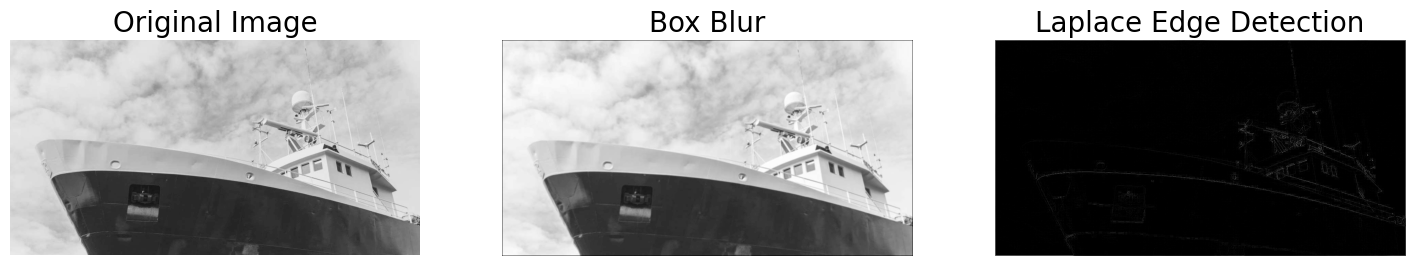

In [8]:
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18, 6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')

En lugar de utilizar una matriz de filtro/núcleo fija, como en el ejemplo del detector de bordes, deje el cálculo de los valores de la matriz de filtro, 
$H$, para la fase de entrenamiento. En otras palabras, hacemos que  se adapte a los datos y no preseleccionada.

En lugar de utilizar una única matriz de filtros, empleamos más de una. Cada una de ellas generará un tipo diferente de características. Por ejemplo, una puede generar bordes diagonales, la otra horizontales, etc. Por lo tanto, cada capa oculta comprenderá más de una matriz de filtrado. Los valores de los elementos de cada una de las matrices de filtrado se calcularán durante la fase de entrenamiento, optimizando algún criterio. En otras palabras, cada capa oculta de una CNN genera un conjunto de características de forma óptima.

![Salida](\imagenes\yu.png)

ilustra la entrada y la primera capa oculta de una CNN. La entrada comprende una matriz imagen. La capa oculta consta de tres matrices de filtrado, a saber,$H_1$, $H_2$, $H_3$. Nótese que cada matriz es el resultado de convolucionar una matriz de filtros diferente sobre la imagen de entrada. Cuantos más filtros se empleen, más mapas de características se extraerán y, en principio, mejor será el rendimiento de la red. Sin embargo, cuantos más filtros utilicemos, más parámetros habrá que aprender, lo que plantea problemas computacionales y de sobreajuste. Nótese que cada píxel de una matriz de mapa de características de salida codifica información dentro del área de la ventana que está definida por la posición correspondiente de la respectiva matriz de filtro.

<details>
<summary>leer</summary>

En una CNN, durante la fase de entrenamiento, se aprenden filtros (kernels) que se utilizan para convolucionar la imagen de entrada. Estos filtros se aplican a regiones locales de la imagen utilizando la operación de convolución. La ventaja clave de esta operación es que los mismos filtros se aplican repetidamente a diferentes partes de la imagen a medida que se deslizan sobre ella.

Esta propiedad tiene varias implicaciones importantes:
    

Invariancia de traslación: Debido a que los mismos filtros se utilizan en toda la imagen, la red es naturalmente invariante a las traslaciones. Esto significa que si un objeto se mueve a una nueva posición en la imagen de entrada, la misma representación se activará en la capa de convolución, solo desplazada espacialmente. La red aún podrá reconocer el objeto sin importar su posición exacta.


Reducción de la dimensionalidad: A medida que los filtros se aplican y se deslizan sobre la imagen, se produce una reducción de la dimensionalidad. Esto es beneficioso porque reduce la cantidad de parámetros y cómputo necesario en comparación con una red completamente conectada.


Extracción de características locales: Las capas convolucionales aprenden a extraer características locales, como bordes, texturas y patrones, en lugar de depender de la posición absoluta de esas características en la imagen.


Esta propiedad de invariancia a las traslaciones es especialmente útil en tareas de reconocimiento de objetos, ya que los objetos pueden aparecer en diferentes ubicaciones dentro de una imagen. 
</details>

A continuación, presentamos algunos términos de la jerga utilizada en relación con las CNN:

- Profundidad: La profundidad de una capa es el número de matrices de filtro que se emplean en esta capa. No debe confundirse profundidad de la red, que corresponde al número total de capas ocultas utilizadas. A veces, nos referimos al número de filtros como el número de canales.

- Campo receptivo: Cada píxel de una matriz de características de salida resulta como una media ponderada de los píxeles dentro de un área específica de la matriz de imágenes de entrada (o de la salida de la capa anterior). El área específica que corresponde a un píxel se conoce como su campo receptivo.

- Deslizamiento: En la práctica, en lugar de deslizar la matriz de filtros de píxel en píxel, se puede deslizar, por ejemplo, $s$ píxeles. Este valor se conoce como stride. Para valores de $s>1$, se obtienen matrices de mapas de características de menor tamaño.

![Salida](\imagenes\A.png)

- Relleno de ceros: A veces, se utilizan ceros para rellenar la matriz de entrada alrededor de los píxeles del borde. De esta forma, la dimensión de la matriz aumenta. Si la matriz original tiene dimensiones 
$(lxl)$, después de expandirla con $p$ columnas y filas, las nuevas dimensiones pasan a ser $(l+2p)$. Esto se muestra en la siguiente figura:

![Salida](\imagenes\ceros.png)


- Término de sesgo: Después de cada operación de convolución que genera un píxel del mapa de características, se añade un término de sesgo, $b$ . El valor de este término también se calcula durante el entrenamiento. Nótese que se utiliza un término de sesgo común para todos los píxeles del mismo mapa de características. Esto está en consonancia con la lógica del reparto de pesos. Del mismo modo que todos los parámetros de una matriz de filtro son compartidos por todos los píxeles de la matriz de imágenes de entrada, se utiliza el mismo término de sesgo para todos los píxeles

- Se puede ajustar el tamaño de una matriz de mapa de características de salida ajustando el valor del stride,$s$, y el número de columnas y filas cero adicionales en el relleno. En general, se puede comprobar fácilmente que si $H \in R^{mxm}$ e  $I \in R^{lxl}$ y $p$ es el número de filas y columnas adicionales para el relleno, entonces el mapa de características tiene dimensiones $k$ x $k$, donde: 

$k=\left \lfloor \frac{l+2p-m}{s} +1 \right \rfloor$

y $\left \lfloor . \right \rfloor$ es el operador suelo. 

Nótese que si los valores de $l$, $m$, $p$ y $s$ son tales que la matriz de filtrado, al deslizarse sobre $I$, cae fuera de $I$, estas operaciones no se realizan. Sólo realizamos operaciones mientras la matriz filtro esté contenida dentro de $I$.

# El paso de la no linealidad:

Una vez que se han realizado las convoluciones y se ha añadido el término de sesgo a todos los valores del mapa de características, el siguiente paso es aplicar una no linealidad (función de activación) a cada uno de los píxeles de cada matriz de mapas de características. Se puede emplear cualquiera de las no linealidades que se han comentado anteriormente. Actualmente, la función de activación lineal rectificada, ReLU, parece ser la más popular

La siguiente figura muestra la imagen obtenida después de filtrar la imagen original del barco con el detector de bordes en la (58) y la Fig. 44B muestra el resultado que se obtiene tras la aplicación de la no linealidad en cada píxel individual.

![Salida](\imagenes\nolineal.png)

# La etapa de agrupación:

El objetivo de este paso es reducir la dimensionalidad de cada matriz de mapas de características. A veces, el paso también se denomina pooling espacial

A veces, el paso también se denomina pooling espacial. Para ello, se define una ventana y se desliza sobre la matriz correspondiente. El deslizamiento puede realizarse adoptando un valor para el respectivo parámetro stride, $s$ . La operación de pooling consiste en elegir un único valor para representar todos los píxeles que se encuentran dentro de la ventana. La operación más utilizada es la agrupación máxima; es decir, entre todos los píxeles que se encuentran dentro de la ventana, el que tiene el valor más alto es seleccionado. Otra posibilidad es la agrupación en la que se selecciona el valor medio de todos los píxeles; a veces se denomina pooling de suma

![Salida](\imagenes\pooling.png)

Por lo tanto, el efecto de la agrupación es reducir (a través de la reducción de la muestra) la dimensionalidad y reducir el tamaño de las matrices. Esto es importante porque la salida de cada capa se presenta como la entrada de la siguiente. Por lo tanto, controlar el tamaño de las matrices es de vital importancia para controlar el número de parámetros implicados. Por supuesto, la reducción de tamaño debe hacerse de tal manera que la pérdida de información sea la menor posible

La siguiente figura muestra el efecto de aplicar el pooling a la imagen de la izquierda. Sin duda, los bordes se vuelven más gruesos, pero la información relacionada con los bordes puede extraerse. Nótese que después de la agrupación, el tamaño de la matriz imagen es reducido. Desde otro punto de vista, el polling resume las estadísticas dentro del área pooling. El pooling puede considerarse un tipo especial de filtrado, en el que, en lugar de la convolución, se selecciona el valor máximo (o medio) de la imagen. El pooling ayuda a que la representación sea aproximadamente invariante a pequeñas traslaciones de la entrada.

![Salida](\imagenes\pooling_invariant.png)

# Convolución sobre volúmenes:

![Salida](\imagenes\yu.png)

la salida de la primera capa oculta comprende tres matrices de imágenes. Éstas constituirán la entrada de la capa siguiente. Tal configuración de entrada que consiste en múltiples imágenes es también el caso cuando la imagen de entrada es en color y su representación se da en términos de una representación RGB; es decir, la entrada consta de tres matrices, una por color. Así, en general, las entradas no son matrices bidimensionales, sino conjuntos de matrices bidimensionales

## ¿cómo se pueden realizar convoluciones cuando hay volúmenes implicados?

![Salida](\imagenes\apilados.png)

Nótese que la profundidad $d$ corresponde al número de imágenes implicadas. Así pues, si tenemos tres imágenes de 256 × 256, $h=256$, $w=256$, $d=3$, entonces $v=h*w*d$

ea la entrada de una capa un volumen $v=h*w*d$. Cuando se trata de volúmenes, las capas ocultas están formadas por volúmenes de filtro/núcleo. Sin embargo, aquí hay un punto crucial. El volumen de filtro asociado con la capa oculta debe tener la misma profundidad que el volumen de entrada, Las dimensiones de altura y anchura pueden ser (y en la práctica suelen ser) diferentes

Supongamos que la entrada es un volumen de **I** de $l*l*d$. Nótese que, éste comprende  $d$ imágenes, digamos, ** $I_r$ ** , $r=1,2,...d$  cada una de ellas de dimensiones $l*l$. Sea **H** el filtro volumen de $m*m*d$. Este último comprende el conjunto de $d$ imágenes, ** $H_r$ **, $r=1,2,...d$, cada una de dimensiones $m*m$. A continuación, la operación de convolución se define mediante los siguientes pasos:

- Convolucionar las correspondientes matrices de imágenes bidimensionales para generar $d$ matrices bidimensionales de salida, es decir

<div style="text-align: center;">

$O_r=I_r \star H_r$,     r=1,2,...,d
    
</div> 
   

- La convolución de los dos volúmenes, **I** y **H** se define como: 

  <div style="text-align: center;">

$\sum_{r=1}^{d}O_r$
    
</div> 

En otras palabras, al convolución de dos volúmenes da como resultado una matriz bidimensional

  <div style="text-align: center;">

3D volúmen $\star$ 3D volúmen = 2D array
    
</div>

![Salida](\imagenes\cnnn.png)

En la práctica, cada capa de una red convolucional comprende varios de estos volúmenes de filtrado. Por ejemplo, si la entrada a una capa es un volumen 
$l*l*d$, y hay, digamos, $c$ volúmenes de núcleo, cada uno de dimensiones $m*m*d$, la salida de la capa será un volumen  $k*k*c$, donde k se determina por al ecuación 


<div style="text-align: center;">

$k=\left \lfloor \frac{l+2p-m}{s} +1 \right \rfloor$
    
</div>

## Red en red y convolución 1 × 1:

La convolución 1 × 1 no tiene sentido cuando se trata de matrices bidimensionales. En efecto una matriz de filtro 1 × 1 es un escalar. Convolucionar una matriz $I$ de $l*l$ con un escalar $a$ equivale a deslizar el valor escalar sobre todos los píxeles y multiplicar cada uno de ellos por 
$a$. El resultado es la trivial $aI$.

Sin embargo, cuando se trata de volúmenes, la convolución 1 × 1 tiene sentido. En este caso, el filtro correspondiente,$H$, es un volumen de tamaño 
$1*1*d$. Geométricamente, se trata de un "tubo", con $h=w=1$ y $d$ elementos en profundidad, $h(1,1,r)$, $r=1,2,...,d$. Por lo tanto, el resultado de la convolución de un volumen $I$ de $l*l*d$ con un $1*1*d$ volumen $H$ es la media ponderada:

<div style="text-align: center;">

$ O= I \star H =\sum_{r=1}^{d}h(1,1,r)I_r$

</div>

Donde $I_r$, $r=1,2,...d$ son las d matrices con dimensiones $l*l$ que comprende **$I$**

## ¿por qué necesitamos una operación de este tipo en la práctica?

Se puede controlar y cambiar su tamaño para adaptarlo a las necesidades de la red

Supongamos que en una etapa/capa de una red profunda hemos obtenido un volumen **I** de dimensiones $k*k*d$. Para cambiar la profundidad de 
$d$ a $c$, conservando el mismo tamaño $k$, para la altura y la anchura, empleamos $c$ volúmenes, $H_t$, $t=1,2,...,c$, cada uno de dimensiones` 
$1*1*d$. Al realizar las $c$ convoluciones obtenemos:

<div style="text-align: center;">

$ O_t= I \star H_t =\sum_{r=1}^{d}h_t(1,1,r)I_r$    , $t=1,2,...,c$

</div>

Apilando $O_t$ obtenemos un volumen **O** de dimensiones $k*k*c$

![Salida](\imagenes\cc.png)

La información original se sigue conservando en el nuevo volumen, de forma promediada. A menudo, una vez obtenido el nuevo volumen **O**, sus elementos se "empujan" a través de una no linealidad, por ejemplo, ReLU.

La convolución $1*1$ seguida de la no linealidad se denomina operación de red en red y su finalidad es añadir una etapa de no linealidad adicional en el flujo de operaciones a través de la red. Por lo tanto, en este contexto, si $c<d$  , la operación de red en red puede considerarse una técnica de reducción de la dimensionalidad no lineal.

# Arquitectura CNN completa:

La forma típica de una red convolucional completa consiste en una secuencia de capas convolucionales, cada una de las cuales que comprende los tres pasos básicos, a saber, convolución, no linealidad y agrupación, como se describe al principio de esta sección. Dependiendo de la aplicación, se pueden apilar tantas capas como sea necesario, donde la salida de una capa se convierte en la entrada de la siguiente

![Salida](\imagenes\cnncom.png)

En la primera capa se emplea un número de volúmenes de filtro (canales) para realizar convoluciones seguidas de la operación no lineal. A continuación, la etapa de pooling toma el relevo para reducir la altura y la anchura de cada volumen de salida, que se utiliza como entrada de la segunda capa, y así sucesivamente. Por último, el volumen de salida de la última capa se vectoriza. A veces, esto también se denomina operación de aplanamiento (flattening)

En otras palabras, todos los elementos del volumen de salida se apilan uno debajo de otro para formar un vector. La vectorización puede realizarse mediante varias estrategias. De hecho, el vector obtenido forma el vector de características que finalmente se ha generado mediante las diversas transformaciones que las convoluciones aplican capa tras capa. Este vector de características se utilizará como entrada para un aprendiz, por ejemplo, para una red neuronal totalmente conectada.

- La estrategia general consiste en ir reduciendo la altura y la anchura mientras se aumenta la profundidad de los volúmenes. Una mayor profundidad corresponde a más filtros por etapa, lo que se traduce en más características. Tanto tanto el número de capas convolucionales como el número de capas de la red totalmente conectada dependen en gran medida de la aplicación, hasta ahora, no existe un método formal para determinar automáticamente el número de capas, así como el número de filtros o nodos por capa.

# Algunas redes convolucionales clásicas:

#### LeNet-5

Este es un ejemplo típico de la primera generación de CNNs y fue construido para reconocer dígitos de números. La entrada de la red consiste en imágenes en escala de grises de tamaño 32 × 32 × 1. La red emplea dos capas de convolución. En la primera capa, el volumen de salida tiene un tamaño de 28 × 28 × 6, que tras la agrupación se convierte en 14 × 14 × 6. Las dimensiones del volumen en la segunda capa eran 10 × 10 × 16 y, tras la agrupación, 5 × 5 × 16. La no linealidad utilizada entonces era de tipo sigmoid. Nótese que la altura y la anchura de los volúmenes disminuyen y la profundidad aumenta, como se ha señalado antes. El número de elementos del último volumen es igual a 400. Estos elementos se apilan en un vector y alimentan los correspondientes nodos de entrada de una red totalmente conectada. Esta última consta de dos capas ocultas con 120 nodos en la primera y 84 nodos en la segunda. Hay 10 nodos de salida, uno por dígito, que utilizan una no linealidad softmax. El número total de parámetros implicados es del orden de 60.000.

![Salida](\imagenes\f.png)

### AlexNet:

Esta red también es histórica ya que, demostró que el punto crucial para hacer grandes redes es la disponibilidad de grandes conjuntos de entrenamiento [Krizhevsky et al., 2012]. El artículo relacionado es el que realmente hizo volver a las CNN y actuó como catalizador para su adopción mucho más allá de la tarea de reconocimiento de dígitos. La Alexnet es un desarrollo de la LeNet-5, pero es mucho más grande e implica aproximadamente 60 millones de parámetros.

Las entradas a la red son imágenes RGB de tamaño 227 × 227 × 3. Comprende cinco capas ocultas y el volumen final consta de 9216 elementos que alimentan una red totalmente conectada con dos capas ocultas de 4096 unidades cada una. La salida consta de 1000 nodos softmax (uno por clase) para reconocer imágenes del conjunto de datos ImageNet para el reconocimiento de objetos. ReLU se ha utilizado como no linealidad en las capas ocultas.

![Salida](\imagenes\alex.png)

### VGG-16:

Esta red [Simonyan and Zisserman, 2014] es mucho mayor que AlexNet. Implica un total de aproximadamente 140 millones de parámetros. La principal característica de esta red es su regularidad. Involucra filtros 3 × 3 para realizar las mismas convoluciones utilizando padding y stride $s=1$ y ventanas 2 × 2 para maxpooling con stride $s=2$. Cada vez que se realiza un pooling, la altura y la anchura de los volúmenes se reducen a la mitad y la profundidad se multiplica por dos. Partiendo de 224 × 224 × 3 imagen de entrada y después de 13 capas el volumen final tiene un tamaño de 7 × 7 × 512, un total de 7168 elementos, que tras su vectorización alimenta a una red totalmente conectada con 2 capas ocultas de 4096 nodos cada una. Los 1000 nodos de salida están construidos en torno a la no linealidad softmax y se ha utilizado ReLU para las unidades ocultas en toda la red.

<div style="text-align: center;">

![Salida](\imagenes\vgg16.png)

</div>!